In [1]:
# Ensure most recent (and not cached) source code is used
%load_ext autoreload
%autoreload 2

In [2]:
# Import libraries
import json

import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8-darkgrid")
plt.style.use("ggplot")

plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
%matplotlib inline
import pandas as pd
pd.options.display.max_columns = None
import scipy
import seaborn as sns

In [3]:
# Import functions from other python files in the project
from pdga_score_scraper import *
from pdga_score_scraper.config import PROCESSED_DATA_DIR

2025-11-17 13:48:39.808 | INFO     | pdga_score_scraper.config:<module>:11 - PROJ_ROOT path is: /home/jon/repos/pdga-score-scraper


In [4]:
event_id = 89433

In [5]:
df = pd.read_json(PROCESSED_DATA_DIR / f"{event_id}-processed.json")

with open(PROCESSED_DATA_DIR / f"{event_id}-metadata-processed.json", 'r') as f:
    metadata = json.load(f)

In [6]:
df.head()

,first_name,last_name,city,state,country,nationality,pdga_num,player_rating,rating_effective_date,player_class,result_id,tournament_division,tournament_place,tied_finish,formatted_place,shot_total,tournament_total_to_par,prize_usd,tournament_dnf,tournament_average_rating,tournament_rating_delta,score_id,round,tee_time,course_name,layout_name,par,round_score,score_to_par,round_dnf,num_birdies,num_bogeys,round_rating,num_holes,layout_length,Hole 1,Hole 2,Hole 3,Hole 4,Hole 5,Hole 6,Hole 7,Hole 8,Hole 9,Hole 10,Hole 11,Hole 12,Hole 13,Hole 14,Hole 15,Hole 16,Hole 17,Hole 18
0,Brandon,Martin,Mohnton,PA,US,None,199207,989,1760400000000,Professional,212159772,MPO,1,False,1st,125,-11,647,False,1022,33,26391524,1,2025-11-17 08:48:01,Nockamixon State Park,HooDoo,68,63,-5,False,8,3,1019,18,9289,5,5,2,3,3,6,3,3,3,3,3,3,4,5,2,3,3,4
1,Brandon,Martin,Mohnton,PA,US,None,199207,989,1760400000000,Professional,212159772,MPO,1,False,1st,125,-11,647,False,1022,33,26419462,2,2025-11-17 01:40:00,Nockamixon State Park,HooDoo,68,62,-6,False,7,1,1024,18,9289,6,3,2,3,3,4,3,4,3,4,3,3,4,4,3,3,4,3
2,Mike,Carman,Ottsville,PA,US,None,48559,995,1760400000000,Professional,212122708,MPO,2,False,2nd,127,-9,431,False,1016,21,26391909,1,2025-11-17 08:43:01,Nockamixon State Park,HooDoo,68,64,-4,False,7,3,1013,18,9289,5,3,2,3,3,4,4,4,4,4,5,2,4,6,2,2,3,4
3,Mike,Carman,Ottsville,PA,US,None,48559,995,1760400000000,Professional,212122708,MPO,2,False,2nd,127,-9,431,False,1016,21,26419460,2,2025-11-17 01:40:00,Nockamixon State Park,HooDoo,68,63,-5,False,6,1,1018,18,9289,5,3,3,3,3,4,3,4,4,3,3,3,4,6,3,2,4,3
4,Andrew,Fish,Baltimore,MD,US,None,58320,1009,1760400000000,Professional,211964506,MPO,4,False,4th,132,-4,250,False,999,-10,26391664,1,2025-11-17 08:44:01,Nockamixon State Park,HooDoo,68,64,-4,False,6,2,1013,18,9289,6,3,2,4,3,4,3,4,4,4,3,3,4,5,4,2,3,3


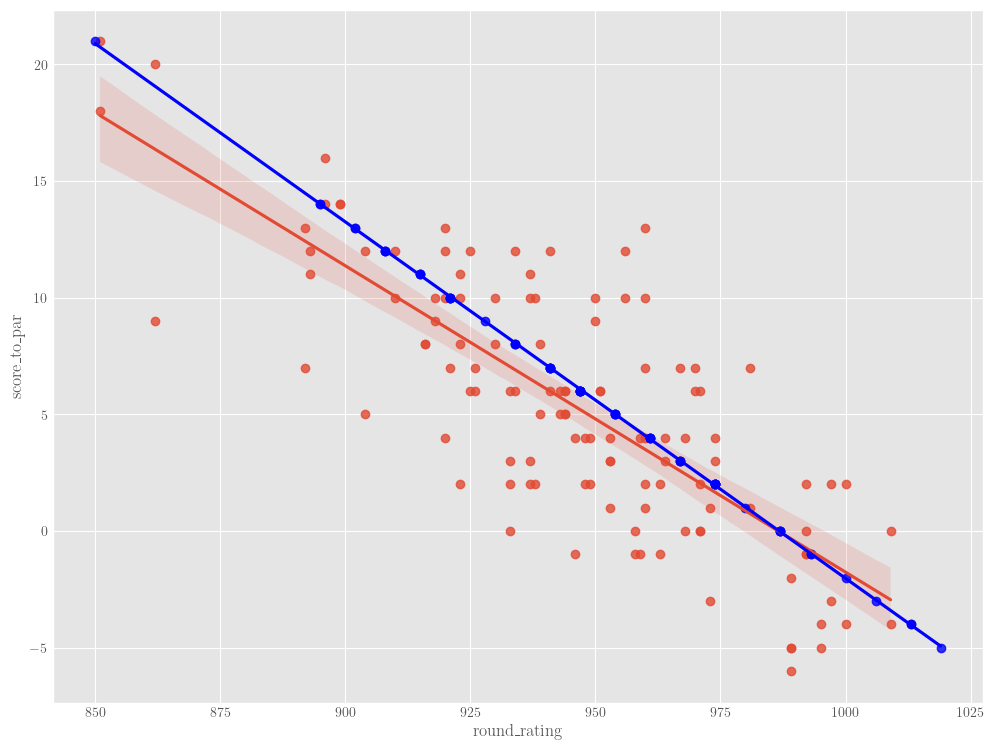

In [7]:
fig, axs = plt.subplots(1, 1, figsize = (12, 9))

sns.regplot(data=df, x="player_rating", y = "score_to_par")
#ax.set_title("Monkies")
#ax.set_xlabel("PDGA player rating")
#ax.set_ylabel("Round score relative course par")

sns.regplot(data=df[df['round'] == 1], x="round_rating", y = "score_to_par", color="blue")

#ax.legend()

plt.show()

## Regressing individual hole scores against player rating

Does hole par inherently affect regresssion slope?  Guessing yes.  Maybe compare only equally-parred holes to evaluate differentiation.

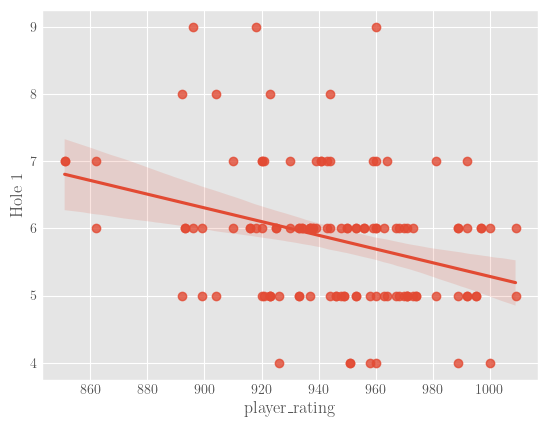

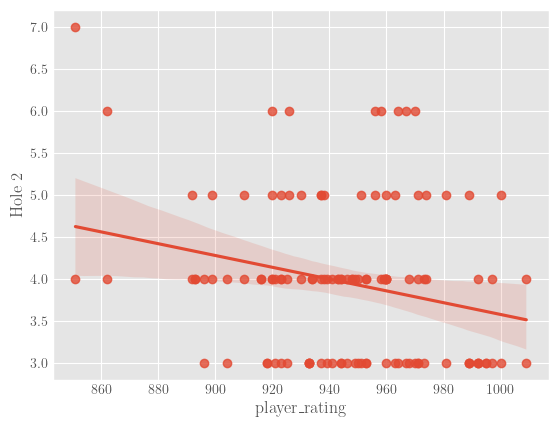

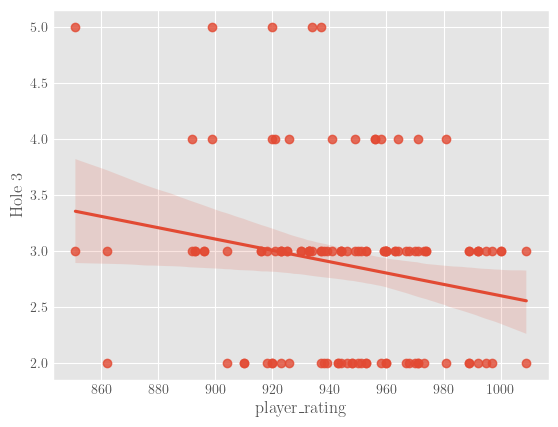

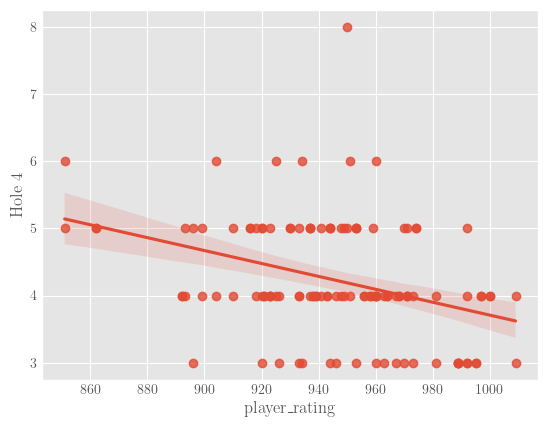

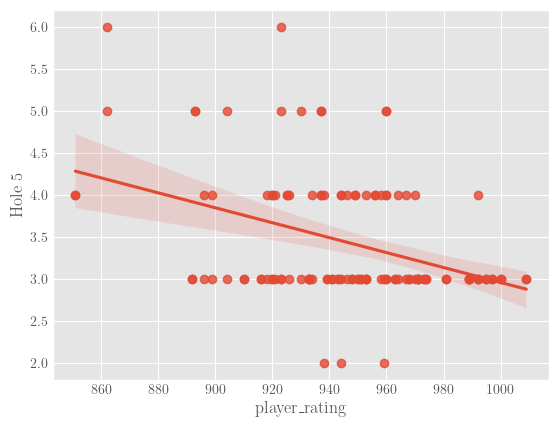

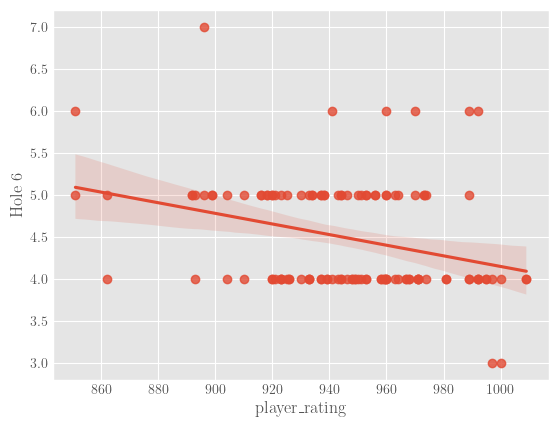

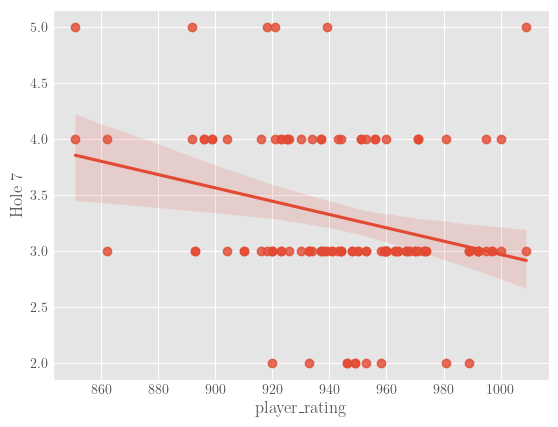

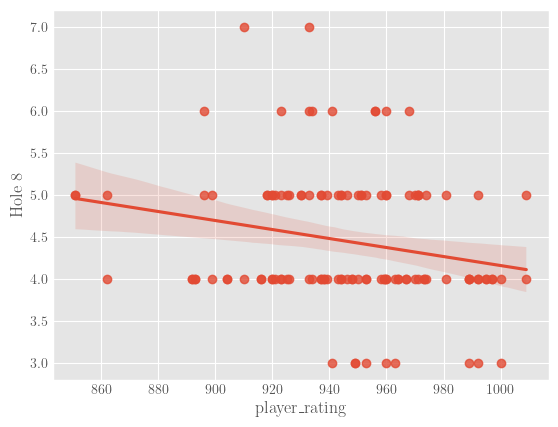

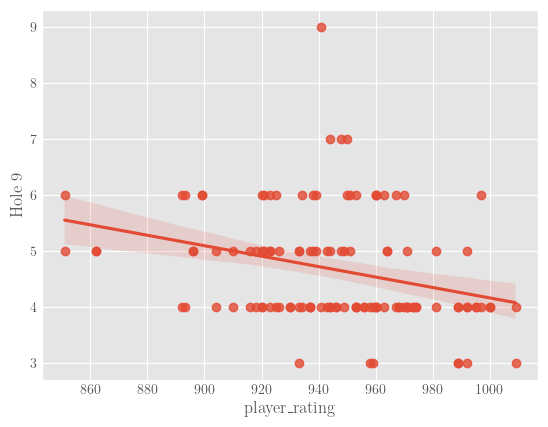

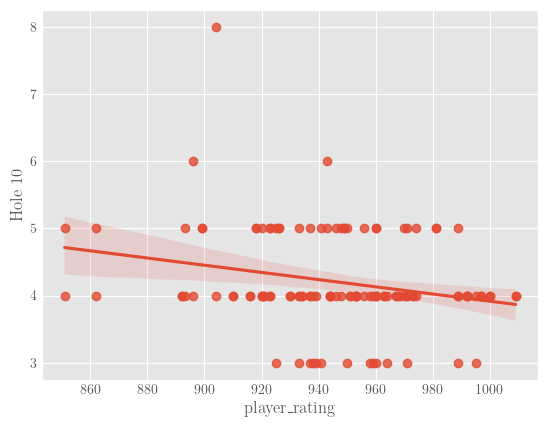

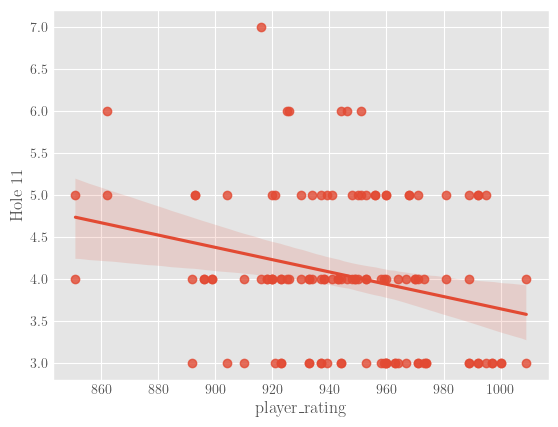

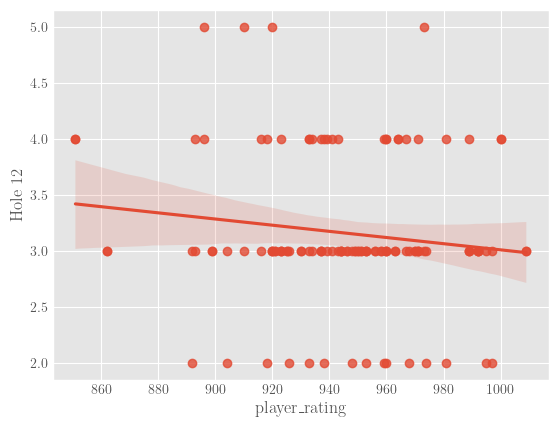

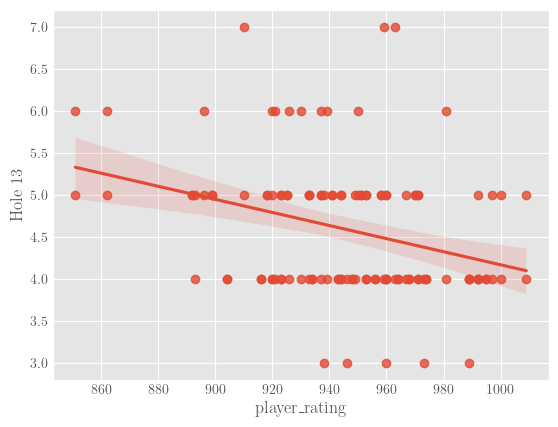

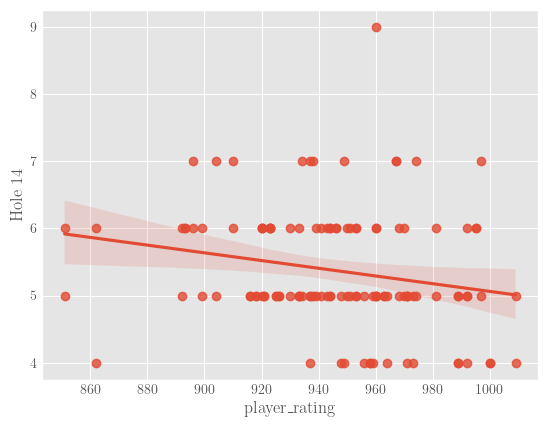

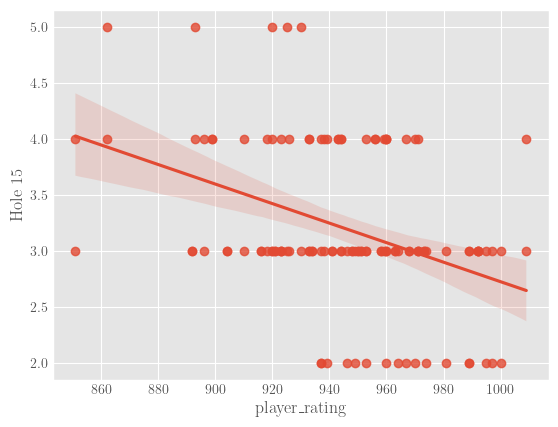

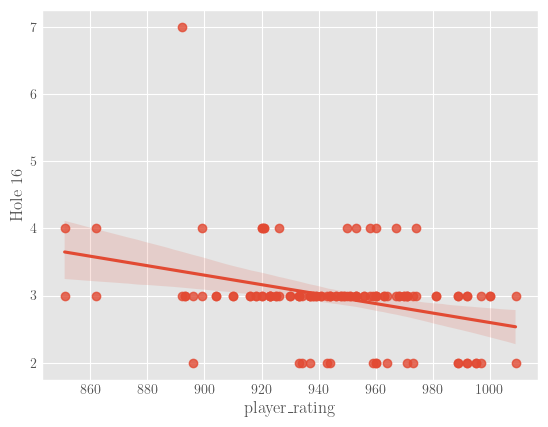

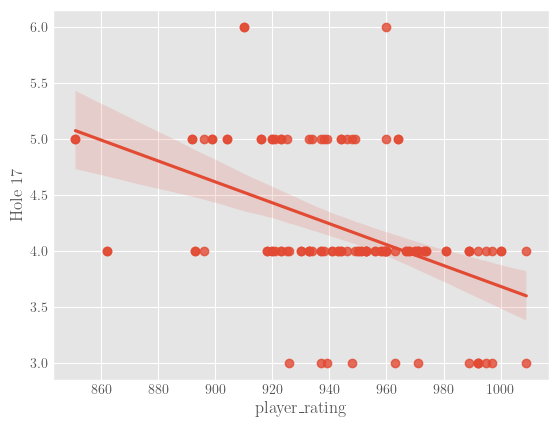

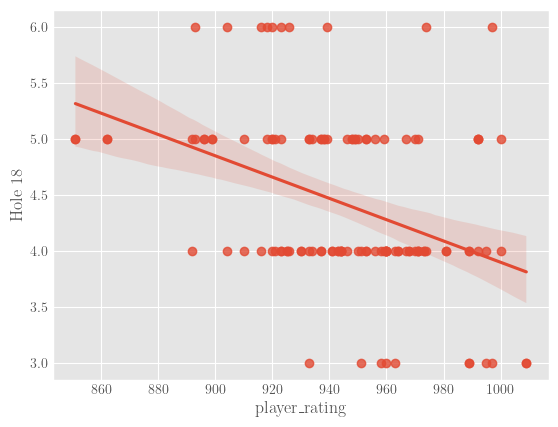

In [8]:
slopes = {}
for i in range(1, 19):
    p = sns.regplot(data=df, x="player_rating", y = f"Hole {i}")
    
    slope, intercept, r, p, sterr = scipy.stats.linregress(x=p.get_lines()[0].get_xdata(),
                                                       y=p.get_lines()[0].get_ydata())
    slopes[i] = slope
    plt.show()

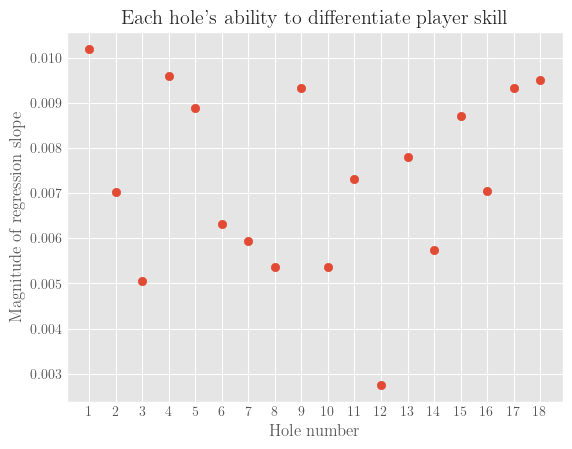

In [9]:
plt.scatter(slopes.keys(), [-1 * x for x in slopes.values()])
plt.xticks(range(1, 19))
plt.xlabel("Hole number")
plt.ylabel("Magnitude of regression slope")
plt.title("Each hole's ability to differentiate player skill")
plt.show()

In [10]:
s = {k: round(v, 4) for k, v in sorted(slopes.items(), key=lambda item: item[1])}
s.keys()

dict_keys([1, 4, 18, 17, 9, 5, 15, 13, 11, 16, 2, 6, 7, 14, 8, 10, 3, 12])

## Metadata

In [11]:
metadata['tournament_info']

{'DateRange': 'Saturday, Oct 18, 2025',
 'EndDate': '2025-10-18',
 'Country': 'United States',
 'Location': 'Quakertown, Pennsylvania',
 'LocationShort': 'Quakertown, PA',
 'Divisions': [{'DivisionID': 100,
   'Division': 'MPO',
   'DivisionName': 'Mixed Pro Open',
   'Players': 31,
   'IsPro': True,
   'ShortName': 'Mixed Pro Open',
   'AbbreviatedName': 'Mixed Pro Open',
   'LatestRound': 2},
  {'DivisionID': 111,
   'Division': 'MP40',
   'DivisionName': 'Mixed Pro 40+',
   'Players': 4,
   'IsPro': True,
   'ShortName': 'Mixed Pro 40+',
   'AbbreviatedName': 'Mixed Pro 40+',
   'LatestRound': 2},
  {'DivisionID': 121,
   'Division': 'MP50',
   'DivisionName': 'Mixed Pro 50+',
   'Players': 5,
   'IsPro': True,
   'ShortName': 'Mixed Pro 50+',
   'AbbreviatedName': 'Mixed Pro 50+',
   'LatestRound': 2},
  {'DivisionID': 400,
   'Division': 'MA1',
   'DivisionName': 'Mixed Amateur 1',
   'Players': 20,
   'IsPro': False,
   'ShortName': 'Mixed Amateur 1',
   'AbbreviatedName': 'Mixed